### This file presents the important features and their weight used in the predictive model 

In [ ]:
#import libraries

In [1]:
import pandas as pd
import numpy as np


from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from eli5 import show_weights, explain_prediction_df, explain_prediction, show_prediction



### 1.1 liver feature importance for sequence plus DNA shape plus histone model

In [2]:
Positive_Liver_SSH = pd.read_csv('POSITIVE_LIVER_SEQSHAHIS_DATA.csv')
Positive_Liver_SSH['Label'] = 'bound'
#Positive_Liver_SSH





Negative_Liver_SSH = pd.read_csv('NEGATIVE_LIVER_SEQSHAHIS_DATA.csv')
Negative_Liver_SSH.isnull().values.any()


Negative_Liver_SSH['Label'] = 'unbound'

overlap_matrix = pd.concat([Positive_Liver_SSH,Negative_Liver_SSH], ignore_index=True)
overlap_matrix = overlap_matrix.reindex(np.random.permutation(overlap_matrix.index))
overlap_matrix['bound']=pd.get_dummies(overlap_matrix.Label, prefix='Label').iloc[:,:-1]
overlap_matrix = overlap_matrix.drop(['Label'], axis =1)
overlap_matrix = pd.DataFrame(overlap_matrix).fillna(0)
overlap_matrix

,Seq-4_A,Seq-4_C,Seq-4_G,Seq-4_T,Seq-3_A,Seq-3_C,Seq-3_G,Seq-3_T,Seq-2_A,Seq-2_C,...,H3K36ME3_2,H3K36ME3_3,H3K36ME3_4,H3K36ME3_5,H3K36ME3_6,H3K36ME3_7,H3K36ME3_8,H3K36ME3_9,H3K36ME3_10,bound
9135,0,0,0,1,0,0,1,0.0,1.0,0.0,...,0.120267,0.014133,0.049800,0.099800,0.009400,0.104333,0.137667,0.146733,0.126533,0
22284,0,0,0,1,1,0,0,0.0,0.0,1.0,...,0.678667,0.076000,0.520000,1.439667,1.169333,1.141533,1.492867,0.960733,1.327933,0
9909,0,0,1,0,0,0,0,1.0,0.0,0.0,...,0.000000,0.281067,0.036267,0.090667,1.056267,0.806067,0.049400,0.282067,0.319000,0
6240,0,0,0,0,1,0,0,0.0,1.0,0.0,...,0.699333,0.533133,0.156200,0.506533,0.397133,0.632133,0.672200,0.124667,0.979200,0
7202,0,0,0,0,0,1,0,0.0,0.0,0.0,...,0.292400,0.000000,0.000000,0.306667,0.174400,0.000000,0.074333,0.354400,0.093067,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,0,0,0,1,1,0,0,0.0,0.0,0.0,...,0.715733,0.531400,0.004000,0.013933,0.027733,0.059933,0.008800,0.226333,0.162000,1
23007,0,0,1,0,0,0,1,0.0,0.0,1.0,...,0.186133,0.173467,0.179867,0.022533,0.000000,0.038467,0.218600,0.208133,0.068400,0
17402,0,0,1,0,1,0,0,0.0,1.0,0.0,...,0.382867,0.217467,0.780867,0.264800,0.000000,0.181067,0.477200,0.402733,0.074133,0
27548,0,0,0,1,0,0,1,0.0,0.0,0.0,...,3.505267,2.119600,1.297467,2.152000,0.695133,2.304000,2.299667,2.175733,4.224400,0


In [3]:
X = overlap_matrix.drop(columns=['bound']).apply(lambda x: x.to_dict(), axis=1).values
Y = overlap_matrix['bound'].values
    


X, Y = shuffle(X, Y, random_state=40210404)
train_X, test_X, train_Y, test_Y = train_test_split(
    X, Y, test_size=0.20, random_state=0)
print('{} items total, {:.1%} true'.format(len(X), np.mean(Y)))

33798 items total, 11.0% true


In [4]:
histone_xgb_params_fixed = {
    'learning_rate': 0.10999997,
    'max_depth': 8,
    'colsample_bytree':0.9234243,
    'max_delta_step': 0.985654334, 
    'random_state':40210404,
    'n_jobs': -1,
    'min_child_weight': 1,
    'scale_pos_weight': 51,
    'subsample':0.899811392006158,
    'use_label_encoder':False
    
}

In [5]:
clf = XGBClassifier(**histone_xgb_params_fixed)
vec = DictVectorizer()
pipeline = make_pipeline(vec, clf)

def evaluate(_clf):
    scores = cross_val_score(_clf, X, Y, scoring='accuracy', cv=5)
    print('Accuracy: {:.3f} ± {:.3f}'.format(np.mean(scores), 2 * np.std(scores)))
    _clf.fit(train_X, train_Y)  # so that parts of the original pipeline are fitted

evaluate(pipeline)

[15:06:13] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:06:27] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:06:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:06:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [6]:
booster = clf.get_booster()
original_feature_names = booster.feature_names
booster.feature_names = vec.get_feature_names()
#print(booster.get_dump()[0])
# recover original feature names
#booster.feature_names = original_feature_names

In [7]:
show_weights(clf, vec=vec)

Weight,Feature
0.2292,Seq-2_A
0.2041,Seq-2_C
0.1311,Seq-2_G
0.0902,EP_1
0.0107,H3K27AC_8
0.0107,ROLL_3
0.0098,Seq-4_A
0.0094,ROLL_6
0.0089,H3K27AC_3
0.0087,H3K27AC_7


In [8]:
from pandas import read_html
import html5lib

In [9]:
Liver_importance = pd.io.html.read_html(show_weights(clf, vec=vec,top = 200).data)
Liver_importance = Liver_importance[0][['Feature','Weight']].T
Liver_importance

,0,1,2,3,4,5,6,7,8,9,...,148,149,150,151,152,153,154,155,156,157
Feature,Seq-2_A,Seq-2_C,Seq-2_G,EP_1,H3K27AC_8,ROLL_3,Seq-4_A,ROLL_6,H3K27AC_3,H3K27AC_7,...,Seq-1_A,Seq-1_G,Seq6_G,Seq+2_A,Seq-2_T,Seq-3_A,Seq+1_T,Seq+1_C,Seq+1_A,Seq6_T
Weight,0.2292,0.2041,0.1311,0.0902,0.0107,0.0107,0.0098,0.0094,0.0089,0.0087,...,0,0,0,0,0,0,0,0,0,0


In [10]:
Liver_importance.to_csv('/mnt/home/marridan/MSU_Project/BMAL1_BINDING/Models/FINAL_MODEL_DOC/Liver_Feature_importance.csv', header=0, index = False)

In [11]:
liver_FM = pd.read_csv('Liver_Feature_importance.csv')
liver_FM

,Seq-2_A,Seq-2_C,Seq-2_G,EP_1,H3K27AC_8,ROLL_3,Seq-4_A,ROLL_6,H3K27AC_3,H3K27AC_7,...,Seq-1_A,Seq-1_G,Seq6_G,Seq+2_A,Seq-2_T,Seq-3_A,Seq+1_T,Seq+1_C,Seq+1_A,Seq6_T
0,0.2292,0.2041,0.1311,0.0902,0.0107,0.0107,0.0098,0.0094,0.0089,0.0087,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
[s.split('_')[0] for s in liver_FM.T.index.values]

['Seq-2',
 'Seq-2',
 'Seq-2',
 'EP',
 'H3K27AC',
 'ROLL',
 'Seq-4',
 'ROLL',
 'H3K27AC',
 'H3K27AC',
 'EP',
 'H3K27AC',
 'Seq4',
 'MGW',
 'Seq-4',
 'EP',
 'Seq3',
 'H3K36ME3',
 'H3K36ME3',
 'EP',
 'Seq3',
 'H3K27AC',
 'PROT',
 'HELT',
 'MGW',
 'H3K4ME1',
 'HELT',
 'H3K4ME1',
 'HELT',
 'H3K4ME1',
 'H3K27ME3',
 'H3K4ME1',
 'ROLL',
 'H3K27ME3',
 'H3K4ME3',
 'H3K4ME1',
 'H3K4ME1',
 'H3K4ME3',
 'H3K4ME1',
 'Seq4',
 'H3K27AC',
 'H3K27AC',
 'H3K27ME3',
 'H3K4ME1',
 'H3K27ME3',
 'EP',
 'H3K4ME1',
 'H3K4ME3',
 'H3K27ME3',
 'MGW',
 'MGW',
 'H3K27AC',
 'PROT',
 'H3K27ME3',
 'H3K4ME3',
 'Seq+1',
 'HELT',
 'H3K4ME1',
 'ROLL',
 'H3K4ME3',
 'ROLL',
 'Seq+2',
 'H3K27ME3',
 'EP',
 'ROLL',
 'H3K27ME3',
 'PROT',
 'MGW',
 'H3K36ME3',
 'H3K27AC',
 'MGW',
 'H3K36ME3',
 'H3K4ME3',
 'EP',
 'H3K36ME3',
 'ROLL',
 'PROT',
 'H3K27AC',
 'EP',
 'EP',
 'H3K36ME3',
 'HELT',
 'PROT',
 'PROT',
 'H3K36ME3',
 'HELT',
 'ROLL',
 'PROT',
 'HELT',
 'EP',
 'Seq-3',
 'H3K4ME3',
 'H3K36ME3',
 'H3K36ME3',
 'H3K4ME3',
 'H3K4ME3',

In [13]:
liver_feature_importance =liver_FM.T.groupby([s.split('_')[0] for s in liver_FM.T.index.values]).sum().T
liver_feature_importance = liver_feature_importance.T.reset_index()
liver_feature_importance = liver_feature_importance.rename({'index': 'Features', 0: 'Weight'}, axis=1) 
liver_feature_importance = liver_feature_importance.sort_values(['Weight'], ascending=False).reset_index(drop=True)
liver_feature_importance

,Features,Weight
0,Seq-2,0.5644
1,EP,0.1222
2,H3K27AC,0.0530
3,ROLL,0.0370
4,H3K4ME1,0.0333
5,MGW,0.0259
6,H3K36ME3,0.0248
7,H3K27ME3,0.0243
8,HELT,0.0236
9,H3K4ME3,0.0212


In [14]:
liver_feature_importance=liver_feature_importance.loc[0:15]
liver_feature_importance

,Features,Weight
0,Seq-2,0.5644
1,EP,0.1222
2,H3K27AC,0.0530
3,ROLL,0.0370
4,H3K4ME1,0.0333
5,MGW,0.0259
6,H3K36ME3,0.0248
7,H3K27ME3,0.0243
8,HELT,0.0236
9,H3K4ME3,0.0212


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns 

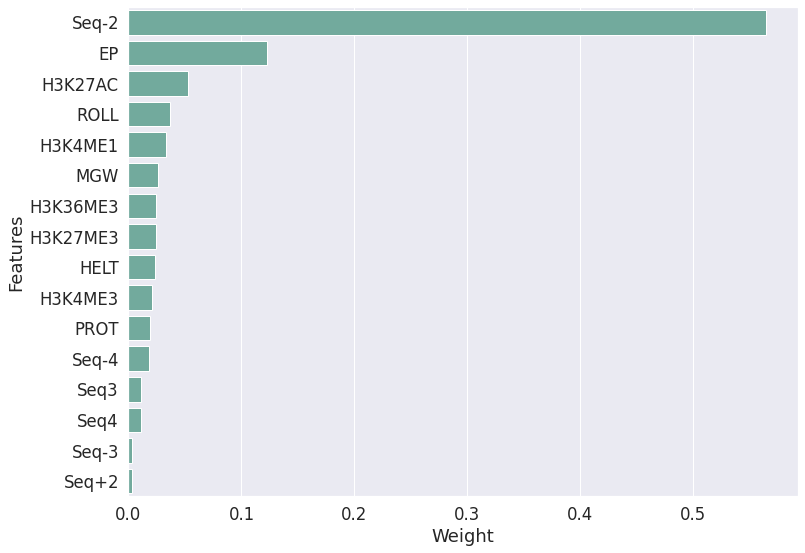

In [16]:
# Reorder this data frame


# Make a barplot

fig = plt.figure()
sns.set(font_scale = 1.5,rc={"figure.figsize":(12, 9)})
fig.set_size_inches(12, 9)

chart=sns.barplot(
    x="Weight", 
    y="Features", 
    data=liver_feature_importance, 
    color='#69b3a2'
  
);


plt.savefig('LIVER_IMPORTANCE_PLOT.png')


### 1.2 kidney feature importance for sequence plus DNA shape plus histone model

In [17]:
Positive_kidney_SSH = pd.read_csv('POSITIVE_KIDNEY_SEQSHAHIST_DATA.csv')
Positive_kidney_SSH['Label'] = 'bound'
#Positive_kidney_SSH



Negative_kidney_SSH = pd.read_csv('NEGATIVE_KIDNEY_SEQSHAHIST_DATA.csv')

Negative_kidney_SSH = pd.DataFrame(Negative_kidney_SSH).fillna(0)

Negative_kidney_SSH.isnull().values.any()


Negative_kidney_SSH['Label'] = 'unbound'
#Negative_kidney_SSH

kidney_matrix = pd.concat([Positive_kidney_SSH,Negative_kidney_SSH], ignore_index=True)
kidney_matrix = kidney_matrix.reindex(np.random.permutation(kidney_matrix.index))
kidney_matrix['bound']=pd.get_dummies(kidney_matrix.Label, prefix='Label').iloc[:,:-1]
kidney_matrix = kidney_matrix.drop(['Label'], axis =1)
kidney_matrix= pd.DataFrame(kidney_matrix).fillna(0)
kidney_matrix

,Seq-4_A,Seq-4_C,Seq-4_G,Seq-4_T,Seq-3_A,Seq-3_C,Seq-3_G,Seq-3_T,Seq-2_A,Seq-2_C,...,H3K36ME3_2,H3K36ME3_3,H3K36ME3_4,H3K36ME3_5,H3K36ME3_6,H3K36ME3_7,H3K36ME3_8,H3K36ME3_9,H3K36ME3_10,bound
241743,0,0,0,1,0,0,1,0,0,0,...,0.308267,0.727000,0.250400,0.488333,0.577733,0.267333,0.167533,0.476867,0.344133,0
37961,0,0,1,0,0,0,1,0,1,0,...,1.443667,0.646933,2.391267,1.744133,1.827267,2.628267,1.041200,0.807733,1.076467,0
121166,1,0,0,0,1,0,0,0,1,0,...,0.527467,0.187867,0.000000,0.076333,0.372067,0.402533,0.000000,0.166000,0.284667,0
53454,1,0,0,0,0,0,1,0,0,0,...,0.171800,0.212600,0.189067,0.047067,0.282467,0.528467,0.250933,0.246267,0.233600,0
281,1,0,0,0,0,0,1,0,0,0,...,2.322400,0.828867,2.356800,1.878667,2.354800,2.560933,4.004600,1.770800,2.481867,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184570,1,0,0,0,0,0,1,0,1,0,...,0.552800,0.496400,0.067667,0.251333,0.400467,0.135400,0.424200,1.043467,1.641933,0
256298,0,0,0,1,0,0,0,1,0,0,...,0.369600,0.000000,0.357000,0.326867,0.142933,0.410800,0.322467,0.584667,0.277267,0
240599,0,1,0,0,1,0,0,0,0,0,...,0.110600,0.124267,0.292000,0.250467,0.104200,0.406267,1.331400,0.428067,0.590933,0
51467,0,0,0,1,0,1,0,0,1,0,...,0.478733,0.101133,0.407133,0.337667,0.250400,0.457533,0.575200,0.619667,0.309467,0


In [18]:
kid_X = kidney_matrix.drop(columns=['bound']).apply(lambda x: x.to_dict(), axis=1).values
kid_Y = kidney_matrix['bound'].values
    


kid_X, kid_Y = shuffle(kid_X, kid_Y, random_state=40210404)
train_X, test_X, train_Y, test_Y = train_test_split(
    kid_X, kid_Y, test_size=0.20, random_state=0)
print('{} items total, {:.1%} true'.format(len(kid_X), np.mean(kid_Y)))

265290 items total, 1.2% true


In [19]:
kidney_xgb_params_fixed = xgb_params_fixed = {
    'learning_rate': 0.10997897,
    'max_depth': 3,
    'colsample_bytree':0.9234243,
    'max_delta_step': 0.985654334, 
    'n_estimators':100 ,
    'n_jobs': -1,
    'min_child_weight': 1,
    'scale_pos_weight': 81,
    'colsample_bylevel': 0.85797,
    'subsample':0.8899811392006158,
    'use_label_encoder':False
    
}

In [ ]:
kid_clf = XGBClassifier(**kidney_xgb_params_fixed)
kid_vec = DictVectorizer()
kid_pipeline = make_pipeline(kid_vec, kid_clf)

def evaluate(_kid_clf):
    scores = cross_val_score(_kid_clf, kid_X, kid_Y, scoring='accuracy', cv=5)
    print('Accuracy: {:.3f} ± {:.3f}'.format(np.mean(scores), 2 * np.std(scores)))
    _kid_clf.fit(train_X, train_Y)  # so that parts of the original pipeline are fitted

evaluate(kid_pipeline)

[15:08:49] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:10:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:11:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:13:05] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [ ]:
booster = kid_clf.get_booster()
original_feature_names = booster.feature_names
booster.feature_names = kid_vec.get_feature_names()
#print(booster.get_dump()[0])
# recover original feature names
#booster.feature_names = original_feature_names

In [ ]:
show_weights(kid_clf, vec=kid_vec)

In [ ]:
Kidney_importance = pd.io.html.read_html(show_weights(kid_clf, vec=kid_vec,top = 200).data)
Kidney_importance = Kidney_importance[0][['Feature','Weight']].T
Kidney_importance

In [ ]:
Kidney_importance.to_csv('/mnt/home/marridan/MSU_Project/BMAL1_BINDING/Models/FINAL_MODEL_DOC/Kidney_Feature_importance.csv', header=0, index = False)

In [ ]:
Kidney_FM = pd.read_csv('Kidney_Feature_importance.csv')
Kidney_FM

In [ ]:
[s.split('_')[0] for s in Kidney_FM.T.index.values]

In [ ]:
Kidney_feature_importance =Kidney_FM.T.groupby([s.split('_')[0] for s in Kidney_FM.T.index.values]).sum().T
Kidney_feature_importance = Kidney_feature_importance.T.reset_index()
Kidney_feature_importance = Kidney_feature_importance.rename({'index': 'Features', 0: 'Weight'}, axis=1) 
Kidney_feature_importance = Kidney_feature_importance.sort_values(['Weight'], ascending=False).reset_index(drop=True)
Kidney_feature_importance


In [ ]:
Kidney_feature_importance=Kidney_feature_importance.loc[0:14]
Kidney_feature_importance

In [ ]:
# Reorder this data frame


# Make a barplot
fig = plt.figure()

sns.set(font_scale = 1.5,rc={"figure.figsize":(12, 9)})
fig.set_size_inches(12, 9)
chart=sns.barplot(
    x="Weight", 
    y="Features", 
    data=Kidney_feature_importance, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2'
  
);

plt.savefig('KIDNEY_IMPORTANCE_PLOT.png')


### 1.3 heart feature importance for sequence plus DNA shape plus histone model

In [ ]:
Positive_heart_SSH = pd.read_csv('POSITIVE_HEART_SEQSHAHIST.csv')
Positive_heart_SSH['Label'] = 'bound'
#Positive_heart_SSH



Negative_heart_SSH = pd.read_csv('NEGATIVE_HEART_SEQSHAHIST.csv')

Negative_heart_SSH = pd.DataFrame(Negative_heart_SSH).fillna(0)

Negative_heart_SSH.isnull().values.any()


Negative_heart_SSH['Label'] = 'unbound'
#Negative_heart_SSH

heart_matrix = pd.concat([Positive_heart_SSH,Negative_heart_SSH], ignore_index=True)
heart_matrix = heart_matrix.reindex(np.random.permutation(heart_matrix.index))
heart_matrix['bound']=pd.get_dummies(heart_matrix.Label, prefix='Label').iloc[:,:-1]
heart_matrix = heart_matrix.drop(['Label'], axis =1)
heart_matrix = pd.DataFrame(heart_matrix).fillna(0)
heart_matrix

In [ ]:
heart_X = heart_matrix.drop(columns=['bound']).apply(lambda x: x.to_dict(), axis=1).values
heart_Y = heart_matrix['bound'].values
    


heart_X, heart_Y = shuffle(heart_X, heart_Y, random_state=40210404)
train_X, test_X, train_Y, test_Y = train_test_split(
    heart_X, heart_Y, test_size=0.20, random_state=0)
print('{} items total, {:.1%} true'.format(len(heart_X), np.mean(heart_Y)))

In [ ]:
heart_xgb_params_fixed = xgb_params_fixed = {
    'learning_rate': 0.2997897,
    'max_depth': 3,
    'colsample_bytree':0.9234243,
    'max_delta_step': 0.985654334, 
    'n_estimators':40 ,
    'n_jobs': -1,
    'min_child_weight': 1,
    'scale_pos_weight': 223,
    'colsample_bylevel': 0.85797,
    'random_state': 40210404,
    'subsample':0.8899811392006158,
    'use_label_encoder':False
    
    
    
}

In [ ]:
heart_clf = XGBClassifier(**heart_xgb_params_fixed)
heart_vec = DictVectorizer()
heart_pipeline = make_pipeline(heart_vec, heart_clf)

def evaluate(_heart_clf):
    scores = cross_val_score(_heart_clf, heart_X, heart_Y, scoring='accuracy', cv=5)
    print('Accuracy: {:.3f} ± {:.3f}'.format(np.mean(scores), 2 * np.std(scores)))
    _heart_clf.fit(train_X, train_Y)  # so that parts of the original pipeline are fitted

evaluate(heart_pipeline)

In [ ]:
booster = heart_clf.get_booster()
original_feature_names = booster.feature_names
booster.feature_names = heart_vec.get_feature_names()
#print(booster.get_dump()[0])
# recover original feature names
#booster.feature_names = original_feature_names

In [ ]:
show_weights(heart_clf, vec=heart_vec)

In [ ]:
heart_importance = pd.io.html.read_html(show_weights(heart_clf, vec=heart_vec,top = 200).data)
heart_importance = heart_importance[0][['Feature','Weight']].T
heart_importance

In [ ]:
heart_importance.to_csv('/mnt/home/marridan/MSU_Project/BMAL1_BINDING/Models/FINAL_MODEL_DOC/heart_Feature_importance.csv', header=0, index = False)

In [ ]:
heart_FM = pd.read_csv('heart_Feature_importance.csv')
heart_FM

In [ ]:
[s.split('_')[0] for s in heart_FM.T.index.values]

In [ ]:
heart_feature_importance =heart_FM.T.groupby([s.split('_')[0] for s in heart_FM.T.index.values]).sum().T
heart_feature_importance = heart_feature_importance.T.reset_index()
heart_feature_importance = heart_feature_importance.rename({'index': 'Features', 0: 'Weight'}, axis=1) 
heart_feature_importance = heart_feature_importance.sort_values(['Weight'], ascending=False).reset_index(drop=True)
heart_feature_importance

In [ ]:
heart_feature_importance=heart_feature_importance.loc[0:12]
heart_feature_importance

In [ ]:


# Make a barplot
fig = plt.figure()

sns.set(font_scale = 1.5,rc={"figure.figsize":(12, 9)})
fig.set_size_inches(12, 9)
chart=sns.barplot(
    x="Weight", 
    y="Features", 
    data=heart_feature_importance, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2'
  
);

#chart.set_xticklabels(chart.get_xticklabels(), rotation=70, size=15)
plt.savefig('HEART_IMPORTANCE_PLOT.png')


### 2.1 liver feature importance for sequence plus DNA shape model

In [ ]:
Liver_SEQ_SHAPE_Pos = pd.read_csv('Pos_DNA_Five_Shape.csv')
Liver_SEQ_SHAPE_Pos['Label'] = 'bound'
#Positive_Liver_SSH





Liver_SEQ_SHAPE_Neg = pd.read_csv('All_Neg_DNA_Five_Shape.csv')
Liver_SEQ_SHAPE_Neg['Label'] = 'unbound'

liver_matrix = pd.concat([Liver_SEQ_SHAPE_Pos,Liver_SEQ_SHAPE_Neg], ignore_index=True)
liver_matrix = liver_matrix.reindex(np.random.permutation(liver_matrix.index))
liver_matrix['bound']=pd.get_dummies(liver_matrix.Label, prefix='Label').iloc[:,:-1]
liver_matrix = liver_matrix.drop(['Label'], axis =1)
liver_matrix = pd.DataFrame(liver_matrix).fillna(0)
liver_matrix

In [ ]:
X = liver_matrix.drop(columns=['bound']).apply(lambda x: x.to_dict(), axis=1).values
Y = liver_matrix['bound'].values
    


X, Y = shuffle(X, Y, random_state=40210404)
train_X, test_X, train_Y, test_Y = train_test_split(
    X, Y, test_size=0.20, random_state=0)
print('{} items total, {:.1%} true'.format(len(X), np.mean(Y)))

In [ ]:
liver_seq_shape_xgb_params= {
    'learning_rate': 0.10999997,
    'max_depth': 8,
    'colsample_bytree':0.9234243,
    'max_delta_step': 0.985654334, 
    'n_estimators':60 ,
    'n_jobs': -1,
    'min_child_weight': 1,
    'scale_pos_weight': 51,
    'subsample':0.899811392006158
    
    
}

In [ ]:
clf = XGBClassifier(**liver_seq_shape_xgb_params)
vec = DictVectorizer()
pipeline = make_pipeline(vec, clf)

def evaluate(_clf):
    scores = cross_val_score(_clf, X, Y, scoring='accuracy', cv=5)
    print('Accuracy: {:.3f} ± {:.3f}'.format(np.mean(scores), 2 * np.std(scores)))
    _clf.fit(train_X, train_Y)  # so that parts of the original pipeline are fitted

evaluate(pipeline)

In [ ]:
booster = clf.get_booster()
original_feature_names = booster.feature_names
booster.feature_names = vec.get_feature_names()
#print(booster.get_dump()[0])
# recover original feature names
#booster.feature_names = original_feature_names

In [ ]:
show_weights(clf, vec=vec)

In [ ]:
from pandas import read_html
import html5lib

In [ ]:
Liver_importance = pd.io.html.read_html(show_weights(clf, vec=vec,top = 200).data)
Liver_importance = Liver_importance[0][['Feature','Weight']].T
Liver_importance

In [ ]:
Liver_importance.to_csv('/mnt/home/marridan/MSU_Project/BMAL1_BINDING/Models/FINAL_MODEL_DOC/Liver_SH_Feature_importance.csv', header=0, index = False)

In [ ]:
liver_FM = pd.read_csv('Liver_SH_Feature_importance.csv')
liver_FM

In [ ]:
[s.split('2')[0] for s in liver_FM.T.index.values]

In [ ]:
liver_feature_importance =liver_FM.T.groupby([s.split('_')[0] for s in liver_FM.T.index.values]).sum().T
liver_feature_importance = liver_feature_importance.T.reset_index()
liver_feature_importance = liver_feature_importance.rename({'index': 'Features', 0: 'Weight'}, axis=1) 
liver_feature_importance = liver_feature_importance.sort_values(['Weight'], ascending=False).reset_index(drop=True)
liver_feature_importance

In [ ]:
liver_feature_importance=liver_feature_importance.loc[0:15]
liver_feature_importance

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
# Reorder this data frame


# Make a barplot

fig = plt.figure()
sns.set(font_scale = 1.5,rc={"figure.figsize":(12, 9)})
fig.set_size_inches(12, 9)

chart=sns.barplot(
    x="Weight", 
    y="Features", 
    data=liver_feature_importance, 
    color='#69b3a2'
  
);


plt.savefig('LIVER_SS_IMPORTANCE_PLOT.png')


### 2.2 heart feature importance for sequence plus DNA shape model

In [ ]:
heart_SEQ_SHAPE_Pos = pd.read_csv('POSITIVE_HEART_SEQ_SHAP_DATA.csv')
heart_SEQ_SHAPE_Pos['Label'] = 'bound'
#Positive_heart_SSH





heart_SEQ_SHAPE_Neg = pd.read_csv('NEGATIVE_HEART_SEQ_SHAP_DATA.csv')
heart_SEQ_SHAPE_Neg['Label'] = 'unbound'

heart_matrix = pd.concat([heart_SEQ_SHAPE_Pos,heart_SEQ_SHAPE_Neg], ignore_index=True)
heart_matrix = heart_matrix.reindex(np.random.permutation(heart_matrix.index))
heart_matrix['bound']=pd.get_dummies(heart_matrix.Label, prefix='Label').iloc[:,:-1]
heart_matrix = heart_matrix.drop(['Label'], axis =1)
heart_matrix = pd.DataFrame(heart_matrix).fillna(0)
heart_matrix

In [ ]:
X = heart_matrix.drop(columns=['bound']).apply(lambda x: x.to_dict(), axis=1).values
Y = heart_matrix['bound'].values
    


X, Y = shuffle(X, Y, random_state=40210404)
train_X, test_X, train_Y, test_Y = train_test_split(
    X, Y, test_size=0.20, random_state=0)
print('{} items total, {:.1%} true'.format(len(X), np.mean(Y)))

In [ ]:
xgb_params_fixed = {
     'learning_rate': 0.1080023,
    'max_depth': 3,
    'colsample_bytree':0.9234243,
    'max_delta_step': 0.985654334, 
    'n_estimators':70 ,
    'n_jobs': -1,
    'min_child_weight': 1,
    'scale_pos_weight': 223,
    'subsample':0.899811392006158
    
    
    
}

In [ ]:
clf = XGBClassifier(**xgb_params_fixed)
vec = DictVectorizer()
pipeline = make_pipeline(vec, clf)

def evaluate(_clf):
    scores = cross_val_score(_clf, X, Y, scoring='accuracy', cv=5)
    print('Accuracy: {:.3f} ± {:.3f}'.format(np.mean(scores), 2 * np.std(scores)))
    _clf.fit(train_X, train_Y)  # so that parts of the original pipeline are fitted

evaluate(pipeline)

In [ ]:
booster = clf.get_booster()
original_feature_names = booster.feature_names
booster.feature_names = vec.get_feature_names()
#print(booster.get_dump()[0])
# recover original feature names
#booster.feature_names = original_feature_names

In [ ]:
show_weights(clf, vec=vec)

In [ ]:
from pandas import read_html
import html5lib

In [ ]:
heart_importance = pd.io.html.read_html(show_weights(clf, vec=vec,top = 200).data)
heart_importance = heart_importance[0][['Feature','Weight']].T
heart_importance

In [ ]:
heart_importance.to_csv('/mnt/home/marridan/MSU_Project/BMAL1_BINDING/Models/FINAL_MODEL_DOC/heart_SH_Feature_importance.csv', header=0, index = False)

In [ ]:
heart_FM = pd.read_csv('heart_SH_Feature_importance.csv')
heart_FM

In [ ]:
[s.split('_')[0] for s in heart_FM.T.index.values]

In [ ]:
heart_feature_importance =heart_FM.T.groupby([s.split('_')[0] for s in heart_FM.T.index.values]).sum().T
heart_feature_importance = heart_feature_importance.T.reset_index()
heart_feature_importance = heart_feature_importance.rename({'index': 'Features', 0: 'Weight'}, axis=1) 
heart_feature_importance = heart_feature_importance.sort_values(['Weight'], ascending=False).reset_index(drop=True)
heart_feature_importance

In [ ]:
heart_feature_importance=heart_feature_importance.loc[0:15]
heart_feature_importance

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
# Reorder this data frame


# Make a barplot

fig = plt.figure()
sns.set(font_scale = 1.5,rc={"figure.figsize":(12, 9)})
fig.set_size_inches(12, 9)

chart=sns.barplot(
    x="Weight", 
    y="Features", 
    data=heart_feature_importance, 
    color='#69b3a2'
  
);


plt.savefig('Heart_SS_IMPORTANCE_PLOT.png')


### 2.3 liver feature importance for sequence plus DNA shape model

In [ ]:
kidney_SEQ_SHAPE_Pos = pd.read_csv('POSITIVE_KIDNEY_SEQSHAPE_DATA.csv')
kidney_SEQ_SHAPE_Pos['Label'] = 'bound'
#Positive_kidney_SSH





kidney_SEQ_SHAPE_Neg = pd.read_csv('NEGATIVE_KIDNEY_SEQ_SHAPE_DATA.csv')
kidney_SEQ_SHAPE_Neg['Label'] = 'unbound'

kidney_matrix = pd.concat([kidney_SEQ_SHAPE_Pos,kidney_SEQ_SHAPE_Neg], ignore_index=True)
kidney_matrix = kidney_matrix.reindex(np.random.permutation(kidney_matrix.index))
kidney_matrix['bound']=pd.get_dummies(kidney_matrix.Label, prefix='Label').iloc[:,:-1]
kidney_matrix = kidney_matrix.drop(['Label'], axis =1)
kidney_matrix = pd.DataFrame(kidney_matrix).fillna(0)
kidney_matrix

In [ ]:
X = kidney_matrix.drop(columns=['bound']).apply(lambda x: x.to_dict(), axis=1).values
Y = kidney_matrix['bound'].values
    


X, Y = shuffle(X, Y, random_state=40210404)
train_X, test_X, train_Y, test_Y = train_test_split(
    X, Y, test_size=0.20, random_state=0)
print('{} items total, {:.1%} true'.format(len(X), np.mean(Y)))

In [ ]:
xgb_params_fixed  = {
    'learning_rate': 0.100997897,
    'max_depth': 3,
    'colsample_bytree':0.9234243,
    'max_delta_step': 0.985654334, 
    'n_estimators':70 ,
    'n_jobs': -1,
    'min_child_weight': 1,
    'scale_pos_weight': 81,
    'colsample_bylevel': 0.85797,
    'subsample':0.8899811392006158
    
    
    
}

In [ ]:
clf = XGBClassifier(**xgb_params_fixed)
vec = DictVectorizer()
pipeline = make_pipeline(vec, clf)

def evaluate(_clf):
    scores = cross_val_score(_clf, X, Y, scoring='accuracy', cv=5)
    print('Accuracy: {:.3f} ± {:.3f}'.format(np.mean(scores), 2 * np.std(scores)))
    _clf.fit(train_X, train_Y)  # so that parts of the original pipeline are fitted

evaluate(pipeline)

In [ ]:
booster = clf.get_booster()
original_feature_names = booster.feature_names
booster.feature_names = vec.get_feature_names()
#print(booster.get_dump()[0])
# recover original feature names
#booster.feature_names = original_feature_names

In [ ]:
show_weights(clf, vec=vec)

In [ ]:
from pandas import read_html
import html5lib

In [ ]:
kidney_importance = pd.io.html.read_html(show_weights(clf, vec=vec,top = 200).data)
kidney_importance = kidney_importance[0][['Feature','Weight']].T
kidney_importance

In [ ]:
kidney_importance.to_csv('/mnt/home/marridan/MSU_Project/BMAL1_BINDING/Models/FINAL_MODEL_DOC/kidney_SH_Feature_importance.csv', header=0, index = False)

In [ ]:
kidney_FM = pd.read_csv('kidney_SH_Feature_importance.csv')
kidney_FM

In [ ]:
[s.split('_')[0] for s in kidney_FM.T.index.values]

In [ ]:
kidney_feature_importance =kidney_FM.T.groupby([s.split('_')[0] for s in kidney_FM.T.index.values]).sum().T
kidney_feature_importance = kidney_feature_importance.T.reset_index()
kidney_feature_importance = kidney_feature_importance.rename({'index': 'Features', 0: 'Weight'}, axis=1) 
kidney_feature_importance = kidney_feature_importance.sort_values(['Weight'], ascending=False).reset_index(drop=True)
kidney_feature_importance

In [ ]:
kidney_feature_importance=kidney_feature_importance.loc[0:15]
kidney_feature_importance

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
# Reorder this data frame


# Make a barplot

fig = plt.figure()
sns.set(font_scale = 1.5,rc={"figure.figsize":(12, 9)})
fig.set_size_inches(12, 9)

chart=sns.barplot(
    x="Weight", 
    y="Features", 
    data=kidney_feature_importance, 
    color='#69b3a2'
  
);


plt.savefig('Kidney_SS_IMPORTANCE_PLOT.png')
